In [37]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data_dir = "E:\\Machine Learning\\flowers-recognition\\flowers"

In [3]:
train_dir = data_dir + "\\train"
test_dir = data_dir + "\\test"

In [4]:
for folder in os.listdir(train_dir):
    print(folder)

daisy
dandelion
rose
sunflower
tulip


In [5]:
from matplotlib.image import imread

In [6]:
rand_daisy = os.listdir(train_dir+"\\daisy")[random.randint(0,509)] 

In [7]:
rand_daisy

'6046940312_8faf552f3e_n.jpg'

In [8]:
rand_daisy = plt.imread(train_dir+"\\daisy\\"+rand_daisy)

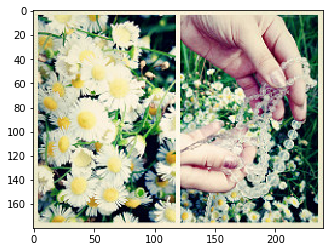

In [9]:
plt.imshow(rand_daisy)

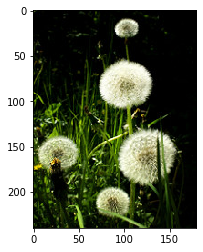

In [10]:
rand_dandelion = os.listdir(train_dir+"\\dandelion")[random.randint(0,509)]
rand_dandelion = plt.imread(train_dir+"\\dandelion\\"+rand_dandelion)
plt.imshow(rand_dandelion)

In [11]:
print(rand_daisy.shape)
print(rand_dandelion.shape)

(180, 240, 3)
(240, 180, 3)


In [12]:
dim1 = []
dim2 = []

for species in os.listdir(train_dir):
    for image_file in os.listdir(train_dir+"\\"+species):
        img = plt.imread(train_dir+"\\"+species+"\\"+image_file)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

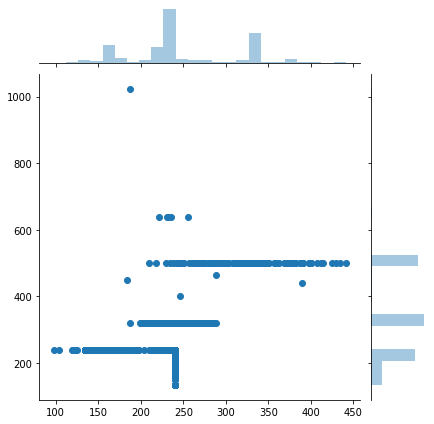

In [13]:
sns.jointplot(dim1,dim2)

In [14]:
np.mean(dim1)

249.25868342705922

In [15]:
np.mean(dim2)

330.9381409196163

In [16]:
image_shape = (250,330,3)

In [17]:
image_gen = ImageDataGenerator(rotation_range = 20,                         
                              width_shift_range=0.1,    
                              height_shift_range=0.1,
                               rescale=1/255,
                              shear_range= 0.1,             
                              zoom_range=0.1,              
                              horizontal_flip=True,        
                               fill_mode = 'nearest')       

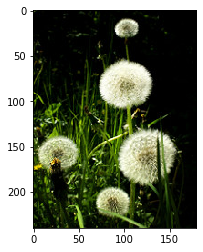

In [18]:
plt.imshow(rand_dandelion)

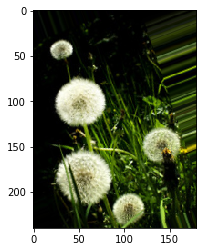

In [19]:
plt.imshow(image_gen.random_transform(rand_dandelion))

In [20]:
image_gen.flow_from_directory(train_dir)

Found 3023 images belonging to 5 classes.


In [21]:
image_gen.flow_from_directory(test_dir)

Found 1300 images belonging to 5 classes.


In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5, activation = "softmax"))

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 330, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 165, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 165, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 82, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 82, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 41, 16)        4

In [25]:
batch_size = 16

In [26]:
train_image_gen = image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3023 images belonging to 5 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory(test_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                              shuffle=False)

Found 1300 images belonging to 5 classes.


In [28]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [29]:
stop = EarlyStopping(patience = 3, monitor = 'val_loss')

In [30]:
results = model.fit_generator(train_image_gen,
                             epochs=100,
                             validation_data=test_image_gen,
                             callbacks = [stop])

Epoch 1/100
189/189 [==============================] - 76s 400ms/step - loss: 1.3594 - accuracy: 0.4069 - val_loss: 1.3087 - val_accuracy: 0.4438
Epoch 2/100
189/189 [==============================] - 76s 403ms/step - loss: 1.2320 - accuracy: 0.4879 - val_loss: 1.7777 - val_accuracy: 0.2631
Epoch 3/100
189/189 [==============================] - 79s 417ms/step - loss: 1.1728 - accuracy: 0.5144 - val_loss: 1.0794 - val_accuracy: 0.5615
Epoch 4/100
189/189 [==============================] - 80s 422ms/step - loss: 1.0254 - accuracy: 0.5931 - val_loss: 0.9410 - val_accuracy: 0.6223
Epoch 5/100
189/189 [==============================] - 83s 439ms/step - loss: 0.9702 - accuracy: 0.6236 - val_loss: 0.9419 - val_accuracy: 0.6223
Epoch 6/100
189/189 [==============================] - 86s 454ms/step - loss: 0.9001 - accuracy: 0.6550 - val_loss: 0.8767 - val_accuracy: 0.6492
Epoch 7/100
189/189 [==============================] - 83s 438ms/step - loss: 0.8655 - accuracy: 0.6652 - val_loss: 0.8702 -

In [31]:
history = pd.DataFrame(model.history.history)

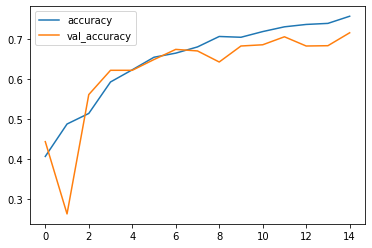

In [32]:
history[['accuracy','val_accuracy']].plot()

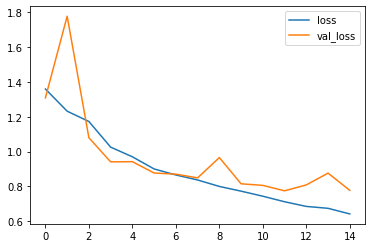

In [33]:
history[['loss','val_loss']].plot()

In [34]:
model.save('flower.h5')

In [40]:
pred_prob = model.predict_generator(test_image_gen)

In [41]:
pred_prob

array([[7.4232459e-02, 8.7045449e-01, 2.3183413e-02, 2.4618050e-02,
        7.5115468e-03],
       [9.6565700e-01, 3.0854529e-02, 2.4819153e-03, 4.3045994e-04,
        5.7606405e-04],
       [5.9679292e-02, 4.1616243e-01, 2.9784483e-01, 5.8093254e-02,
        1.6822013e-01],
       ...,
       [1.7251824e-03, 4.4734472e-05, 8.3099060e-02, 3.5011275e-03,
        9.1162992e-01],
       [1.1009054e-01, 2.3566499e-01, 2.7736205e-01, 1.8298525e-01,
        1.9389717e-01],
       [6.7341790e-07, 4.1218538e-08, 3.1138086e-03, 5.2083906e-06,
        9.9688029e-01]], dtype=float32)

In [44]:
preds = pred_prob.argmax(axis=-1) 

In [45]:
preds

array([1, 0, 1, ..., 4, 2, 4], dtype=int64)

In [46]:
print(test_image_gen.classes)

[0 0 0 ... 4 4 4]


In [ ]:
print(classification_report(test_image_gen.classes))